<a href="https://colab.research.google.com/github/BhaveshWadibhasme/Explainable_AI/blob/master/Titanic_survival_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
#------------Install_required_packages---------------------------
!pip install autoplotter


In [104]:
#------------------import_required_packages-----------------------
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from autoplotter import run_app

In [105]:
#---------------------Read_titanic_dataset------------------------
df = pd.read_csv("/content/Data_set.csv")

In [106]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [107]:
#--------------NUll_value_analysis---------------------
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [108]:
#-----------------Null_percentage_in_null-valued_columns--------------------------
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [109]:

#------------Dataset_information-----------------------
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


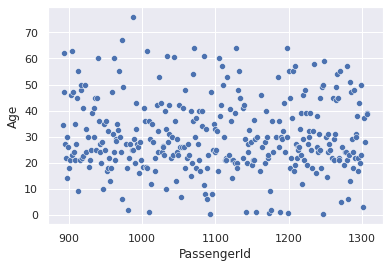

In [110]:
#--------------Check_distribution_of_Age--------------
import seaborn as sns
sns.set()
sns.scatterplot(x = 'PassengerId',y = 'Age',data = df)

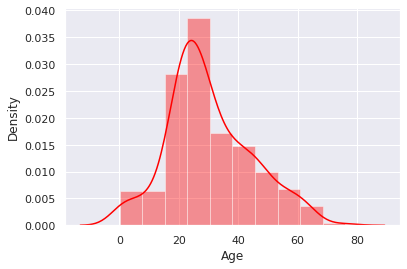

In [111]:
sns.distplot(df['Age'], kde=True, color='red', bins=10)

In [112]:
df['Age'].mean(),df['Age'].median()

(30.272590361445783, 27.0)

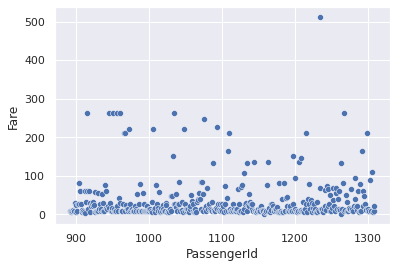

In [113]:
#--------------Check_distribution_of_Age--------------
import seaborn as sns
sns.set()
sns.scatterplot(x = 'PassengerId',y = 'Fare',data = df)

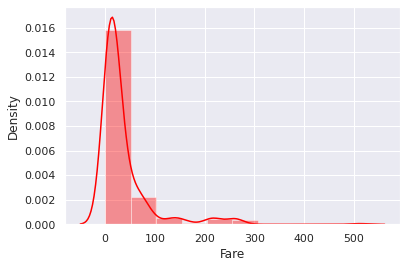

In [114]:
sns.distplot(df['Fare'], kde=True, color='red', bins=10)

In [115]:
df['Fare'].mean(),df['Fare'].median()

(35.6271884892086, 14.4542)

In [116]:
df['Fare']  = df['Fare'].fillna(df['Fare'].median())

The distribution of Age is close to normal distribution. There is slight skewness towards right.

In [117]:
df['Age']  = df['Age'].fillna(df['Age'].mean())

In [118]:
#--------------cabin_variable_has_78%_data_missing-------------------
df = df.drop('Cabin',axis=1)

In [119]:
#--------------Drop_unnecessary_columns-------------------------
col_list = ["PassengerId","Name","Ticket"]
df = df.drop(col_list,axis=1)

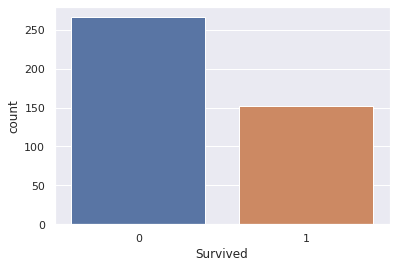

In [120]:
#---------------Chek_data_imbalance--------------------
sns.countplot(x = 'Survived',data = df)

In [121]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [122]:
# categorical_variables_with_less_than_5_unique_val --Implement_one_hot_encoding
var_list1 = ["Sex","Embarked"]
# categorical_variable_with_numeric_vals -- Implement_cat_encoding
var_list2 = ["Pclass","SibSp","Parch"]

In [123]:
#-----Implement_one_hot_encoding--------------------
for column in var_list1:
  temp = pd.get_dummies(pd.Series(df[column]))
  df = pd.concat([df,temp],axis=1)
  df = df.drop([column],axis=1)

In [124]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,1,3,47.0,1,0,7.0000,1,0,0,0,1
2,0,2,62.0,0,0,9.6875,0,1,0,1,0
3,0,3,27.0,0,0,8.6625,0,1,0,0,1
4,1,3,22.0,1,1,12.2875,1,0,0,0,1


In [125]:
#df.to_csv("processed_file.csv",index=False)

In [126]:
Mean_encoded_subject = df.groupby(['Pclass'])['Survived'].mean().to_dict()
df['Pclass'] =  df['Pclass'].map(Mean_encoded_subject)
  

In [127]:
Mean_encoded_subject = df.groupby(['SibSp'])['Survived'].mean().to_dict()
df['SibSp'] =  df['SibSp'].map(Mean_encoded_subject)
  

In [128]:
Mean_encoded_subject = df.groupby(['Parch'])['Survived'].mean().to_dict()
df['Parch'] =  df['Parch'].map(Mean_encoded_subject)
  

In [129]:
target = df['Survived']
df = df.drop('Survived',axis=1)


In [130]:
#------------------Split_data_into_train_test_split-------------------
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(df,target,test_size = 0.2,random_state = 42)

In [131]:
#--------------Train_machine_learning_model------------------
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)
model.fit(X_train,y_train)
print("The cross_validation score is: {}".format(cross_val_score(model,X_train,y_train,cv=5)))
print()

The cross_validation score is: [1. 1. 1. 1. 1.]



In [132]:
#-----------------Evaluate_model--------------------
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [133]:
run_app(df,mode = 'inline')

<IPython.core.display.Javascript object>

In [134]:
run_app(df,mode='external')

AutoPlotter is running on:


<IPython.core.display.Javascript object>